In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the text

In [4]:
df=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
#no nullvalues
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df.describe().transpose()

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,negative,25000


# map the sentiment column

In [14]:
df['true_sentiment']=df['sentiment'].map({'positive':1,'negative':0})

In [15]:
df.head()

,review,sentiment,true_sentiment
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [16]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

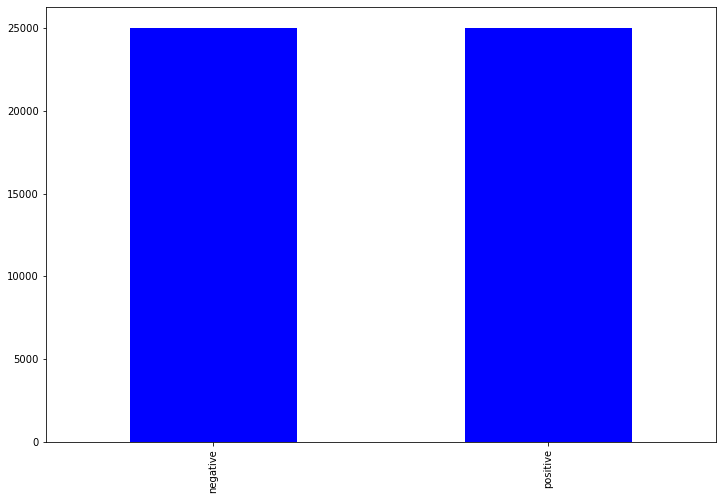

In [18]:
plt.figure(figsize=(12,8))
df['sentiment'].value_counts().plot(kind='bar',color='blue')

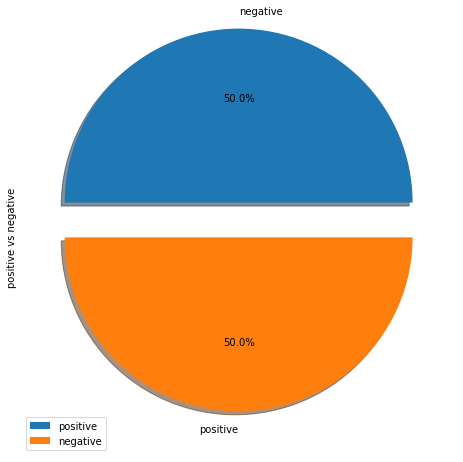

In [19]:
plt.figure(figsize=(12,8))
df['sentiment'].value_counts().plot(kind='pie',shadow = True,explode=[0.2,0],autopct='%1.1f%%')
plt.ylabel("positive vs negative")
plt.legend(["positive", "negative"])
plt.show()

In [21]:
df['length']=df['review'].apply(len)
df.head()

,review,sentiment,true_sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1,1761
1,A wonderful little production. <br /><br />The...,positive,1,998
2,I thought this was a wonderful way to spend ti...,positive,1,926
3,Basically there's a family where a little boy ...,negative,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,1317


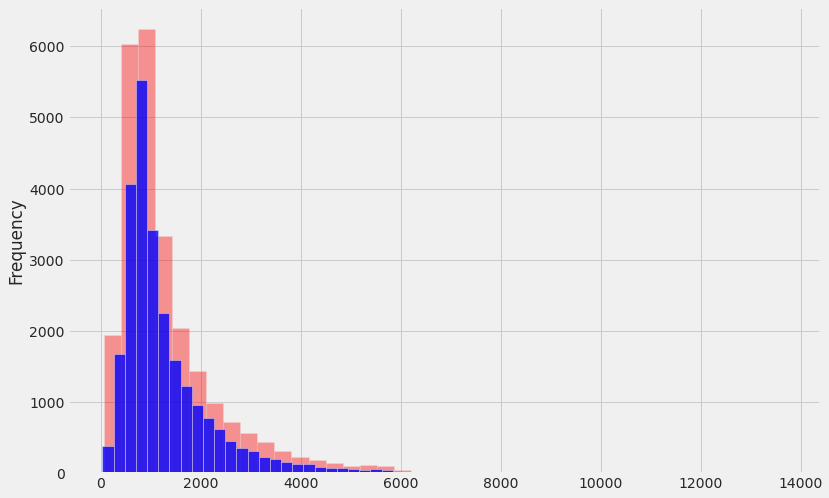

In [22]:
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
df[df['sentiment']=='positive']['length'].plot(kind='hist',bins=40,color='red',alpha=0.4)
df[df['sentiment']=='negative']['length'].plot(kind='hist',bins=40,color='blue',alpha=0.8)

In [24]:
df.groupby('sentiment').describe()['length']

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,25000.0,1294.06436,945.892669,32.0,706.0,973.0,1567.25,8969.0
positive,25000.0,1324.79768,1031.492627,65.0,691.0,968.0,1614.00,13704.0


In [25]:
df.sort_values('length',ascending=False)

,review,sentiment,true_sentiment,length
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,positive,1,13704
40521,There's a sign on The Lost Highway that says:<...,positive,1,12988
31240,"(Some spoilers included:)<br /><br />Although,...",positive,1,12930
31436,"Back in the mid/late 80s, an OAV anime by titl...",positive,1,12129
5708,**Attention Spoilers**<br /><br />First of all...,positive,1,10363
...,...,...,...,...
19874,This movie is terrible but it has some good ef...,negative,0,52
28920,Primary plot!Primary direction!Poor interpreta...,negative,0,51
40817,I hope this group of film-makers never re-unites.,negative,0,49
31072,"What a script, what a story, what a mess!",negative,0,41


In [27]:
df.iloc[31481]['review']

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [38]:
positive=df[df['sentiment']=='positive']
negative=df[df['sentiment']=='negative']

# Creating word clouds

In [39]:
from wordcloud import WordCloud, STOPWORDS

In [40]:
def create_wordcloud(input_data):
    combined_text= ' '.join(input_data['review'].astype(str).tolist())
    stopwords = set(STOPWORDS) 
    show_wordcloud =WordCloud(stopwords=stopwords,background_color='white',max_words=3000,
                    colormap='viridis', width=800, height=600).generate(combined_text)
    plt.figure(figsize=(12,8), frameon=True)
    plt.imshow(show_wordcloud,interpolation='bilinear')
    plt.axis('off')
   
    plt.show()

# Positive reviews

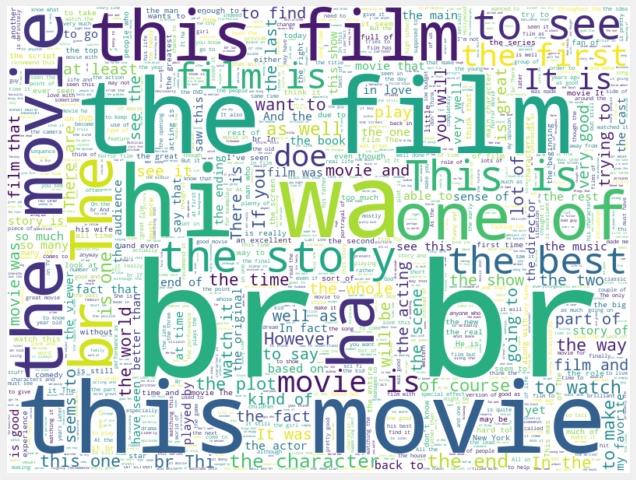

In [42]:
create_wordcloud(positive)

# Negative reviews

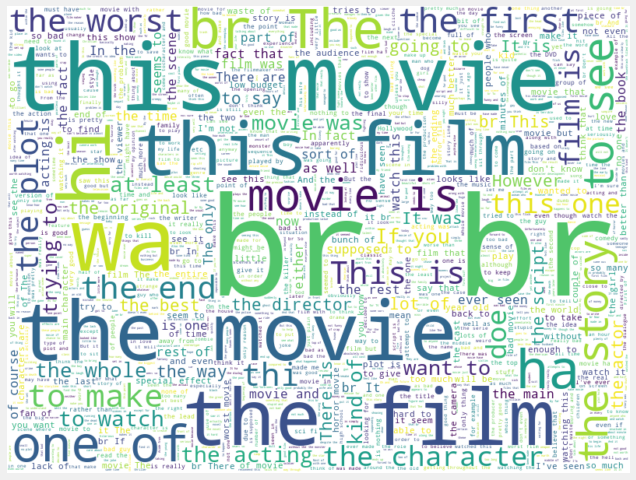

In [44]:
create_wordcloud(negative)

# Data Cleaning(remove punctuation and stopwords)Tokenization And Lemmatization

In [45]:
import re
from string import punctuation
from nltk.corpus import stopwords
sw=stopwords.words('english')
print(sw)
len(sw)




['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [46]:
import nltk
lemmatizer=nltk.WordNetLemmatizer()

In [47]:
def remove_punctuation_and_stopwords(text):
    #removing punctuation
    without_punctuation=[w for w in text if w not in punctuation]
    without_punctuation="".join(without_punctuation)
    
    # tokenizing
    tokens=re.split('\W+',without_punctuation)
    
    #removing stopwords
    without_punc_and_stopwords=[w for w in tokens if w.lower() not in sw]
    
    #lemmatization
    after_lemma=[lemmatizer.lemmatize(word) for word in without_punc_and_stopwords]
    return after_lemma
    

# Bag of Words Approach

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer=remove_punctuation_and_stopwords)
X=vectorizer.fit_transform(df['review'])
print(X.shape)

(50000, 203972)


In [50]:
X

<50000x203972 sparse matrix of type '<class 'numpy.float64'>'
	with 5014047 stored elements in Compressed Sparse Row format>

In [51]:
y=df['true_sentiment']

# splitting

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
print('size of train set',X_train.shape,y_train.shape)
print('size of test set',X_test.shape,y_test.shape)

size of train set (35000, 203972) (35000,)
size of test set (15000, 203972) (15000,)


# Model Building

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [54]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [55]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [56]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

In [57]:
def predict_labels(clf, X_test):
    return (clf.predict(X_test))

# Training

In [58]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, accuracy_score(y_test,pred)))
pred_scores

[('SVC', 0.8976),
 ('KN', 0.8015333333333333),
 ('NB', 0.8644),
 ('DT', 0.7144666666666667),
 ('LR', 0.8824),
 ('RF', 0.8171333333333334),
 ('AdaBoost', 0.8038),
 ('BgC', 0.7766666666666666),
 ('ETC', 0.7596666666666667)]

In [59]:
df_pred = pd.DataFrame(pred_scores, columns=['model','Score'])
df_pred.set_index('model',inplace=True)

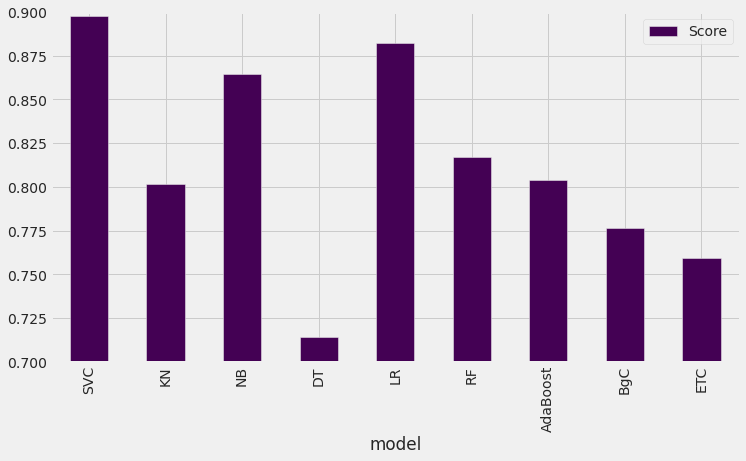

In [61]:
df_pred.plot(kind='bar',ylim=(0.7,0.9), figsize=(11,6), align='center',colormap='viridis')